# Ebola Spread and Interventions in Liberia

*Devin Keller*

# Paper Replicated & Other References

The scientific paper that I decided to replicate and expand upon is titled "*Modeling the effect of comprehensive interventions on Ebola virus transmission*", by Mingwang Shen, Yanni Xiao, & Libin Rong. This paper is interesting because they study multiple Ebola control interventions such as isolation, media coverage, safe burial practices, and vaccination. Shen et al use their mathematical model to determine the total numbers of cases and deaths  due to Ebola virus in Guinea, Sierra Leone, and Liberia. I have decided to focus on the data for Liberia, a country on the coast of Western Africa, because they include data for the effect of vaccination for this country. The references for this paper, as well as some other tools I used, are shown below.


*Articles*

    Shen, M., Xiao, Y. & Rong, L. Modeling the effect of comprehensive interventions on Ebola virus transmission. Sci Rep 5, 15818 (2015). https://doi.org/10.1038/srep15818


*Tellurium*

    Somogyi, Andy T (2019), "tellurium," https://nanohub.org/resources/tellurium. (DOI: 10.21981/EVG3-D766).

    Medley et al. (2018). "Tellurium notebooks—An environment for reproducible dynamical modeling in systems biology." PLoS Computational Biology, 14(6), e1006220.

    Choi et al. (2018). "Tellurium: An extensible python-based modeling environment for systems and synthetic biology." Biosystems, 171, 74-79.


# Background

Ebola virus is a rare, deadly virus that originated in Africa. There are multiple strains of Ebola virus that have evolved separately from one another, but the one most people are familiar with from the 2014 outbreak is the *Zaire ebolavirus*. The initial symptoms include fever, body aches, diarrhea, and vomiting, and more serious symptoms include organ failure and uncontrollable bleeding. Ebola first developed in animals, most likely bats, and initially spread to humans through a spillover event, such as hunting. Ebola spreads only through bodily fluids, even if the infected individual has already died. 

In the most recent large outbreak in 2014, there were a total of 28,616 total confirmed/suspected cases, and 11,310 total deaths. In Liberia alone, there were a total of 10,678 cases and 4,810 deaths. There are still periodic small outbreaks (June 2020 in DRC for example), but we are unlikely to see any large epidemics due to better vaccines and understanding of the disease.

Many people might wonder why Ebola would be a topic of study after the fact, since it seems we have it under control at the moment. My hope is that this model might be of use for mutations of Ebola or even for new viral outbreaks, as we have seen with COVID. 

Shen et al use ODEs to model this outbreak with eight different epidemiological states. A flow diagram defining the transition between these epidemiological states and their rates is shown as the following:
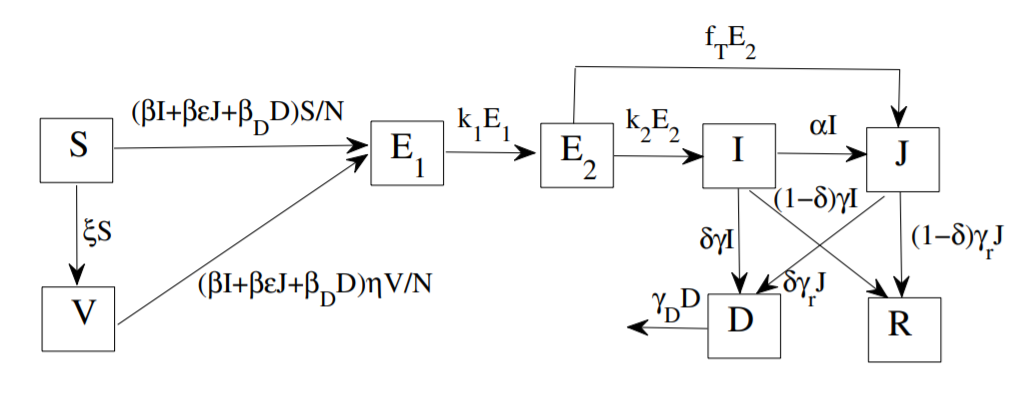

***

Another way to represent this flow diagram is by using the first-order Ordinary Differential Equations as shown below:

### Equations: 

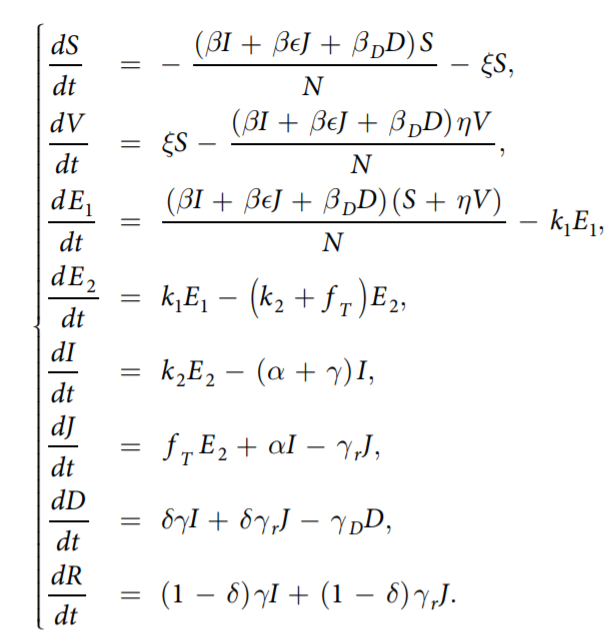



***
The replicated model includes eight different epidemiological states, listed and defined below:


### Epidemiological States:

&nbsp;
<font size="3">
<center>
$S \rightarrow$ Susceptible individuals who can be infected by Ebola virus following a contact with infectious cases
</center>
</font>
&nbsp;

<font size="3">
<center>
$V \rightarrow$ Vaccinated individuals
</center>
</font>
&nbsp;

<font size="3">
<center>
$E_1 \rightarrow$ (Undetectable) latently infected individuals
</center>
</font>
&nbsp;

<font size="3">
<center>
$E_2 \rightarrow$ (Detectable) latently infected individuals
</center>
</font>
&nbsp;

<font size="3">
<center>
$I \rightarrow$ Infectious individuals with symptoms
</center>
</font>
&nbsp;

<font size="3">
<center>
$J \rightarrow$ Isolated individuals
</center>
</font>
&nbsp;

<font size="3">
<center>
$D \rightarrow$ Individuals who are dead but have not been buried; they can still transmit the disease during funerals
</center>
</font>
&nbsp;

<font size="3">
<center>
$R \rightarrow$ Recovered individuals
</center>
</font>
&nbsp;

***
### Parameters: 

Lastly, we define the parameters used in the ODE's as below. The paper used defines all of these values as the mean value, and also lists the 95% confidence interval that they fall in. Many of these values are known based on experimental data, while others are fitted based on the mathematical model. There are some additional parameters defined in the paper that are a variation of these, but we will not list them until needed.


&nbsp;
<font size="3">
<center>
$N \rightarrow$ Size of the total population = 4,294,077
</center>
</font>
&nbsp;

<font size="3">
<center>
$1/k_1 \rightarrow$ Mean time from latent undetectable class to latent detectable class = 4 days
</center>
</font>
&nbsp;

<font size="3">
<center>
$1/k_2 \rightarrow$ Mean time from latent detectable class to infectious symptomatic class = 3 days
</center>
</font>
&nbsp;

<font size="3">
<center>
$1/\alpha \rightarrow$ Mean time from infectious symptomatic class to isolated class = 3 days
</center>
</font>
&nbsp;

<font size="3">
<center>
$1/\gamma \rightarrow$ Mean time that infectious individuals are removed by recovery or disease induced death = 6 days
</center>
</font>
&nbsp;

<font size="3">
<center>
$1/\gamma_r \rightarrow$ Mean time that isolated individuals are removed by recovery or disease induced death = 7.2 days
</center>
</font>
&nbsp;

<font size="3">
<center>
$1/\gamma_D \rightarrow$ Mean time from death to traditional burial = 2 days
</center>
</font>
&nbsp;

<font size="3">
<center>
$\beta \rightarrow$ Human-to-human transmission rate = 0.35 days$^{-1}$
</center>
</font>
&nbsp;

<font size="3">
<center>
$\beta_D \rightarrow$ Transmission rate during funeral = 0.2986 days$^{-1}$
</center>
</font>
&nbsp;

<font size="3">
<center>
$\epsilon \rightarrow$ Relative transmissibility of isolated individuals = 0.5649
</center>
</font>
&nbsp;

<font size="3">
<center>
$\delta \rightarrow$ Case fatality rate = 0.4765
</center>
</font>
&nbsp;

<font size="3">
<center>
$f_T \rightarrow$ Rate at which latent detectable individuals progress to the isolation class = 0.4898 days$^{-1}$
</center>
</font>
&nbsp;

<font size="3">
<center>
$\xi \rightarrow$ Vaccination rate = 1.3x10$^{-3}$
</center>
</font>
&nbsp;

<font size="3">
<center>
$n \rightarrow$ Efficacy of vaccination = 0.5487
</center>
</font>
&nbsp;

In [1]:
#importing necessary libraries
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import lmfit
from ipywidgets import interact,Label
import ipywidgets as widgets
from IPython.display import display, clear_output

# Non-normalized data

As I began working on this model, I noticed that many of my values of total case numbers and the overall time series seems to be much higher than expected. There is nothing in the paper that indicates why this might be happening. Shown in the code below is one example of a basic time series where the shape seems to be correct, but the overall scale is far off.

# Fixing this problem
One idea I had was that the entire population might not actually be susceptible in reality. Ebola is traditionally found in small pockets around the country and there is not enough mixing between many of these hotspots for everyone to actually get it. By guessing and checking, I found that diving the entire poulation by a large number gave us the proper figure. 

Try to get the model to fit the true data by changing the normalizing factor and comparing to the figure below the graph. What does this number mean?

In [34]:
time_seriesNorm = '''
    //Equations
    R1: S -> V ; xi * S ;
    R2: S -> E1 ; (((beta_reg*I)+(beta_reg*epsilon1*J)+(beta_D*D))*S)/N ;
    R3: V -> E1 ; (((beta_reg*I)+(beta_reg*epsilon1*J)+(beta_D*D))*(n*V))/N ;
    R4: E1 -> E2 ; k1*E1 ;
    R5: E2 -> I ; k2*E2 ;
    R6: E2 -> J ; f_T*E2 ;
    R7: I -> J ; alpha1*I ;
    R8: I -> R ; (1-delta1)*(gamma1*I) ;
    R9: J -> R ; (1-delta1)*(gamma_r*J) ;
    R10: J -> D ; delta1*gamma_r*J ;
    R11: I -> D ; delta1*gamma1*I ;
    R12: D -> ; gamma_D*D ;
    
    
    //Inputs
    k1 = 1/4
    k2 = 1/3
    alpha1 = 1/3
    gamma1 = 1/6
    gamma_r = 1/7.2
    gamma_D = 1/2
    beta_reg = 0.3500 //avg transmission rate
    epsilon1 = 0.5649
    beta_D = 0.2986 //dead transition rate
    delta1 = 0.4765
    f_T = 0.4898
    xi = 1.3E-3
    n = 0.5487
    
    //Initial Conditions
    N = 4.3E6 ; //Population of Liberia
    S0 := N-I ; //Number of susceptible people
    S = S0
    I = 1 ; //Start with 1 infected person
    E1 = 0 ; // One undetectable infected
    E2 = 0 ; // One detectable infected
    J = 0 ; //None isolated to start
    D = 0 ; //No deaths to start
    R = 0 ; //None recovered to start 

     
'''

def set_normalization(div):
    m = te.loada(time_seriesNorm)
    style = {'description_width': 'initial'}
    layout = widgets.Layout(width = '500px')
    m.N /= div
    m.S = m.N - m.I
    s = m.simulate(0, 450, 4500, ['time', '[E1]', '[E2]', '[I]', '[J]', '[D]']) 
    m.plot(title = "Post-media Ebola Infections & Deaths", xtitle = "time (days)", ytitle = "Individuals", xlim = [0,450])
    
    

interact(set_normalization, div = widgets.FloatSlider(min = 1, max = 600, step = 1, value = 1, continuous_update=False, description = "Normalizing factor", layout = layout, style = style)) 
         

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Normalizing factor', layout=Layout(width='500px'), max=600.0, min=1.0, step=1.0, style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

<function __main__.set_normalization(div)>

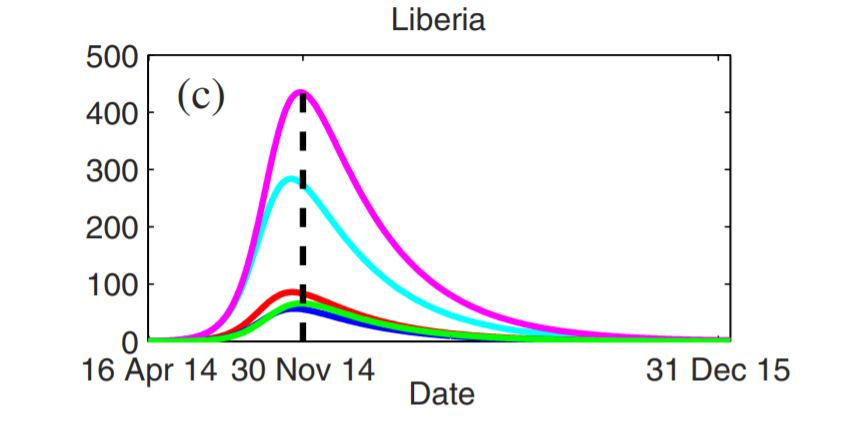

# What does this mean?

You should notice that if the total population is divided by somewhere around 400-500, we see a max isolated category of about 450 individuals, as indicated by the figure above from the paper. 

Since we are dividing the population by ~450 to get the proper figures, we can tell that only around 1 in 450 people live in the hotspots where Ebola is more likely/possible to infect the individuals

# Unvaccinated Model

Next we take a look at the effects of vaccination on the Ebola outbreak. Today, there are Ebola vaccines that are alsmost 90% efective, but in the past outbreaks there was either no vaccine or one that was not so effective

This first model takes into account no vaccination, which was very common in rural African areas where this outbreak was common. 

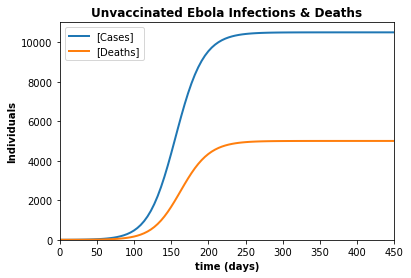

In [7]:
time_series1 = '''
    //Equations
    R1: S -> V ; xi * S ; 
    R2: S -> E1 ; ((beta_reg*I*S)/N)+((beta_reg*epsilon1*J*S)/N)+((beta_D*D*S)/N) ;
    R3: V -> S ; ((beta_reg*I*n*V)/N)+((beta_reg*epsilon1*J*n*V)/N)+((beta_D*D*n*V)/N)
    R4: E1 -> E2 ; k1*E1 ;
    R5: E2 -> I ; k2*E2 ;
    R6: E2 -> J ; f_T*E2 ; 
    R7: I -> J ; alpha1*I ;
    R8: I -> R ; (1-delta1)*(gamma1*I) ;
    R9: I -> D ; delta1*gamma1*I ;
    R10: J -> R ; (1-delta1)*(gamma_r*J) ;
    R11: J -> D ; delta1*gamma_r*J ; 
    R12: D -> ; gamma_D*D ;
    
    R13: -> Cases ; (k2+f_T)*E2
    R14: -> Deaths ; (delta1*gamma1*I)+(delta1*gamma_r*J)
    
    //Parameters
    k1 = 1/4
    k2 = 1/3
    alpha1 = 1/3
    gamma1 = 1/6
    gamma_r = 1/7.2
    gamma_D = 1/2
    beta_reg = 0.3500 //avg transmission rate post-media
    epsilon1 = 0.5649
    beta_D = 0.2986 //dead transition rate post-media
    delta1 = 0.4765
    f_T = 0.4898
    xi = 0 //Unvaccinated population
    n = 0.5487
    
    //Initial Conditions
    N = 4.3E6/300 ; //Population of Liberia
    S = N-V-E1-E2-I-J-R ; //Number of susceptible people
    I = 1 ; //Start with 1 infected person
    E1 = 0 ; // One undetectable infected
    E2 = 0 ; // One detectable infected
    J = 0 ; //None isolated to start
    D = 0 ; //No deaths to start
    R = 0 ; //None recovered to start
'''


m = te.loada(time_series1)
s=m.simulate(0,450, 100, ['time', '[Cases]', '[Deaths]'])
m.plot(title = "Unvaccinated Ebola Infections & Deaths", xtitle = "time (days)", ytitle = "Individuals", xlim = [0,450], ylim = [0,11000])  
    
    

# Vaccinated model

Next, we look at the effect of vaccination using the data from the paper that was presented for Liberia. The vaccination used at the time had an efficacy of roughly 55% and a very low vaccination rate.

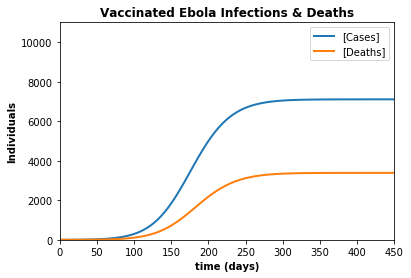

In [26]:
time_series2 = '''
    //Equations
    R1: S -> V ; xi * S ; 
    R2: S -> E1 ; ((beta_reg*I*S)/N)+((beta_reg*epsilon1*J*S)/N)+((beta_D*D*S)/N) ;
    R3: V -> S ; ((beta_reg*I*n*V)/N)+((beta_reg*epsilon1*J*n*V)/N)+((beta_D*D*n*V)/N)
    R4: E1 -> E2 ; k1*E1 ;
    R5: E2 -> I ; k2*E2 ;
    R6: E2 -> J ; f_T*E2 ; 
    R7: I -> J ; alpha1*I ;
    R8: I -> R ; (1-delta1)*(gamma1*I) ;
    R9: I -> D ; delta1*gamma1*I ;
    R10: J -> R ; (1-delta1)*(gamma_r*J) ;
    R11: J -> D ; delta1*gamma_r*J ; 
    R12: D -> ; gamma_D*D ;
    
    R13: -> Cases ; (k2+f_T)*E2
    R14: -> Deaths ; (delta1*gamma1*I)+(delta1*gamma_r*J)
    
    //Parameters
    k1 = 1/4
    k2 = 1/3
    alpha1 = 1/3
    gamma1 = 1/6
    gamma_r = 1/7.2
    gamma_D = 1/2
    beta_reg = 0.3500 //avg transmission rate post-media
    epsilon1 = 0.5649
    beta_D = 0.2986 //dead transition rate post-media
    delta1 = 0.4765
    f_T = 0.4898
    xi = 0.0013 //Unvaccinated population
    n = 0.5487
    
    //Initial Conditions
    N = 4.3E6/300 ; //Population of Liberia
    S = N-V-E1-E2-I-J-R ; //Number of susceptible people
    I = 1 ; //Start with 1 infected person
    E1 = 0 ; // One undetectable infected
    E2 = 0 ; // One detectable infected
    J = 0 ; //None isolated to start
    D = 0 ; //No deaths to start
    R = 0 ; //None recovered to start
'''


m = te.loada(time_series2)
s=m.simulate(0,450, 100, ['time', '[Cases]', '[Deaths]'])
m.plot(title = "Vaccinated Ebola Infections & Deaths", xtitle = "time (days)", ytitle = "Individuals", xlim = [0,450], ylim = [0,11000])

# What is the effect of different vaccination levels?

Aside from using no vacination as well as the normal vaccination levels that were reported in Liberia, I wanted to explore the effects of differing levels of vaccination rates and efficacy. Using sliders, it is easy to try out multiple values to explore whether efficacy or vaccination rate has the largest effect.

In [27]:
slider_model = '''
    //Equations
    R1: S -> V ; xi * S ; 
    R2: S -> E1 ; ((beta_reg*I*S)/N)+((beta_reg*epsilon1*J*S)/N)+((beta_D*D*S)/N) ;
    R3: V -> S ; ((beta_reg*I*n*V)/N)+((beta_reg*epsilon1*J*n*V)/N)+((beta_D*D*n*V)/N)
    R4: E1 -> E2 ; k1*E1 ;
    R5: E2 -> I ; k2*E2 ;
    R6: E2 -> J ; f_T*E2 ; 
    R7: I -> J ; alpha1*I ;
    R8: I -> R ; (1-delta1)*(gamma1*I) ;
    R9: I -> D ; delta1*gamma1*I ;
    R10: J -> R ; (1-delta1)*(gamma_r*J) ;
    R11: J -> D ; delta1*gamma_r*J ; 
    R12: D -> E1 ; gamma_D*D ;
    
    R13: -> Cases ; (k2+f_T)*E2
    R14: -> Deaths ; (delta1*gamma1*I)+(delta1*gamma_r*J)    

    
    //Inputs
    k1 = 1/4
    k2 = 1/3
    alpha1 = 1/3
    gamma1 = 1/6
    gamma_r = 1/7.2
    gamma_D = 1/2
    beta_reg = 0.1701 //avg transmission rate post-media
    epsilon1 = 0.5649
    beta_D = 0.1214 //dead transition rate post-media
    delta1 = 0.4765
    f_T = 0.4898
    xi = 1.3E-3
    n = 0.5487
    
    //Initial Conditions
    N = 4.3E6/500 ; //Population of Liberia
    S = N-I ; //Number of susceptible people
    I = 1 ; //Start with 1 infected person
    E_1 = 0 ; // One undetectable infected
    E_2 = 0 ; // One detectable infected
    J = 0 ; //None isolated to start
    D = 0 ; //No deaths to start
    R = 0 ; //None recovered to start 
     
''' 

button = widgets.Button(description = "Reset Values")
display(button)

button2 = widgets.Button(description = "Remove Vaccination")
display(button2)

def reset_button_clicked(b):
    
    clear_output(wait=True)
    button = widgets.Button(description = "Reset Values")
    display(button)
    display(button2)
    style = {'description_width': 'initial'}
    layout = widgets.Layout(width = '500px')
    interact(plotIndv, VaccEfficacy = widgets.FloatSlider(min = 0.00, max = 1.00, step = 0.01, value = 0.55, continuous_update=False, description = "Vaccine Efficacy", layout = layout, style = style), 
         VaccRate = widgets.FloatSlider(min = 0.0000, max = 0.0020, step = 0.0001, value = 0.0007, readout_format = '.4f', continuous_update=False,description = "Vaccination Rate", layout = layout, style = style))
    button.on_click(reset_button_clicked) 
    
button.on_click(reset_button_clicked)

def no_vacc_button(c):
    clear_output(wait=True)
    button2 = widgets.Button(description = "Remove Vaccination")
    display(button)
    display(button2)
    style = {'description_width': 'initial'}
    layout = widgets.Layout(width = '500px')
    interact(plotIndv, VaccEfficacy = widgets.FloatSlider(min = 0.00, max = 1.00, step = 0.01, value = 0.00, continuous_update=False, description = "Vaccine Efficacy", layout = layout, style = style), 
         VaccRate = widgets.FloatSlider(min = 0.0000, max = 0.0020, step = 0.0001, value = 0.0000, readout_format = '.4f', continuous_update=False,description = "Vaccination Rate", layout = layout, style = style))
    button2.on_click(no_vacc_button)
    
button2.on_click(no_vacc_button)
    
def plotIndv(VaccEfficacy, VaccRate):
    m = te.loada(slider_model)
    m.n = 1-VaccEfficacy
    m.xi = VaccRate
    s = m.simulate(0, 2000, 2000, ['time', 'Cases', 'Deaths'])
    plt.xlabel('time (days)')
    plt.ylabel('Individuals')
    plt.ylim([0,15000])
    plt.xlim([0,800])
    plt.plot(s['Deaths'], label = "Total Deaths")
    plt.plot(s['Cases'], label = "Total Cases")
    plt.legend(loc="upper right")
    plt.show()   
    
style = {'description_width': 'initial'}
layout = widgets.Layout(width = '500px')
interact(plotIndv, VaccEfficacy = widgets.FloatSlider(min = 0.00, max = 1.00, step = 0.01, value = 0.55, continuous_update=False, description = "Vaccine Efficacy", layout = layout, style = style), 
         VaccRate = widgets.FloatSlider(min = 0.0000, max = 0.0020, step = 0.0001, value = 0.0007, readout_format = '.4f', continuous_update=False,description = "Vaccination Rate", layout = layout, style = style))

Button(description='Reset Values', style=ButtonStyle())

Button(description='Remove Vaccination', style=ButtonStyle())

interactive(children=(FloatSlider(value=0.55, continuous_update=False, description='Vaccine Efficacy', layout=Layout(width='500px'), max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0007, continuous_update=False, description='Vaccination Rate', layout=Layout(width='500px'), max=0.002, readout_format='.4f', step=0.0001, style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

# Fitting recorded data to model

Lastly, we can fit the true number of cases, as reported by the WHO, to the model used in the paper. Using personally generated text files that correspond to the case counts at https://www.cdc.gov/vhf/ebola/history/2014-2016-outbreak/case-counts.html , start by graphing the total number of cases and deaths for Liberia.

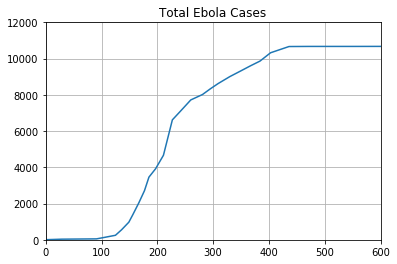

In [28]:
Data = np.genfromtxt('WHOcases.txt', delimiter=',')
T = Data[:,0]
C = Data[:,1]
plt.plot(T, C)
plt.title('Total Ebola Cases')
plt.ylim([0,12000])
plt.xlim([0,600])
plt.grid()
plt.show()

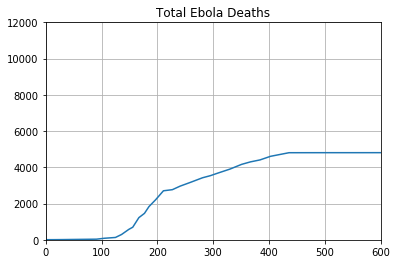

In [29]:
Data = np.genfromtxt('WHOdeaths.txt', delimiter=',')
T = Data[:,0]
D = Data[:,1]
plt.plot(T, D)
plt.title('Total Ebola Deaths')
plt.ylim([0,12000])
plt.xlim([0,600])
plt.grid()
plt.show()

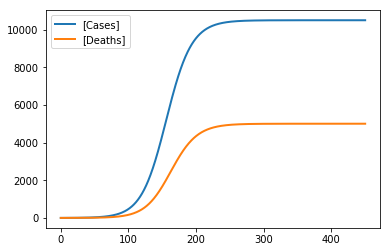

In [30]:
to_fit = '''
    //Equations
    R1: S -> V ; xi * S ; 
    R2: S -> E1 ; ((beta_reg*I*S)/N)+((beta_reg*epsilon1*J*S)/N)+((beta_D*D*S)/N) ;
    R3: V -> S ; ((beta_reg*I*n*V)/N)+((beta_reg*epsilon1*J*n*V)/N)+((beta_D*D*n*V)/N)
    R4: E1 -> E2 ; k1*E1 ;
    R5: E2 -> I ; k2*E2 ;
    R6: E2 -> J ; f_T*E2 ; 
    R7: I -> J ; alpha1*I ;
    R8: I -> R ; (1-delta1)*(gamma1*I) ;
    R9: I -> D ; delta1*gamma1*I ;
    R10: J -> R ; (1-delta1)*(gamma_r*J) ;
    R11: J -> D ; delta1*gamma_r*J ; 
    R12: D -> ; gamma_D*D ;
    
    R13: -> Cases ; (k2+f_T)*E2
    R14: -> Deaths ; (delta1*gamma1*I)+(delta1*gamma_r*J)
    
    //Parameters
    k1 = 1/4
    k2 = 1/3
    alpha1 = 1/3
    gamma1 = 1/6
    gamma_r = 1/7.2
    gamma_D = 1/2
    beta_reg = 0.3500 //avg transmission rate post-media
    epsilon1 = 0.5649
    beta_D = 0.2986 //dead transition rate post-media
    delta1 = 0.4765
    f_T = 0.4898
    xi = 0 
    n = 0.5487
    
    //Initial Conditions
    N = 4.3E6/300 ; //Population of Liberia
    S = N-V-E1-E2-I-J-R ; //Number of susceptible people
    I = 1 ; //Start with 1 infected person
    E1 = 0 ; // One undetectable infected
    E2 = 0 ; // One detectable infected
    J = 0 ; //None isolated to start
    D = 0 ; //No deaths to start
    R = 0 ; //None recovered to start
'''


m = te.loada(to_fit)
s=m.simulate(0,450, 900, ['time', '[Cases]', '[Deaths]'])
m.plot()    
    

In [31]:
def cost_fun(p):
    m = te.loada(to_fit)
    pp = p.valuesdict()
    for i in range(nParameters):
        m.model[toFit[i]] = pp[toFit[i]]
    try:
        s = m.simulate(int(T[0]), int(T[-1]), len(T)*10, ['time','Cases','Deaths'])
        diff = 0
        for i in range(len(T)):
            j = (np.abs(s['time'] - T[i])).argmin()
            diff += (C[i] - s['Cases'][j]) ** 2
            diff += (D[i] - s['Deaths'][j]) ** 2
        diff = np.sqrt(diff)
        clear_output(wait=True)
        plt.plot(T, C,'.',label='Cases Data')
        plt.plot(s['time'], s['Cases'],label='Cases')
        plt.plot(T, D,'.',label='Deaths Data')
        plt.plot(s['time'], s['Deaths'],label='Deaths')
        #plt.ylim([0,10000])
        plt.xlim([0,700])
        plt.legend(loc="upper left")
        plt.title(str(diff))
        plt.show()
    except RuntimeError:
        diff = 1E21
    return(diff)

def iter_cb(p,iter,resid):
    if resid < 3500.0:
        return True

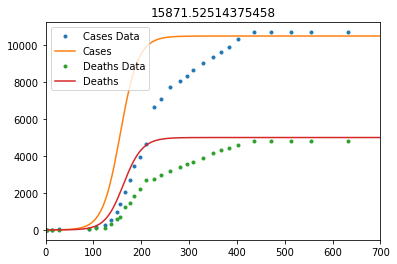

15871.52514375458

In [32]:
toFit = ['k1','k2','alpha1','gamma1','gamma_r','gamma_D','beta_reg','epsilon1',
         'beta_D','delta1','f_T','xi','n']
k1 = 1/4
k2 = 1/3
alpha1 = 1/3
gamma1 = 1/6
gamma_r = 1/7.2
gamma_D = 1/2
beta_reg = 0.3500 
epsilon1 = 0.5649
beta_D = 0.2986 
delta1 = 0.4765
f_T = 0.4898
xi = 0.00001 
n = 0.5487
nParameters = len(toFit)
params = lmfit.Parameters()
params.add('k1', value=k1, min=k1/10.0, max=k1*10.0)
params.add('k2', value=k2, min=k2/10.0, max=k2*10.0)
params.add('alpha1', value=alpha1, min=alpha1/10.0, max=alpha1*10.0)
params.add('gamma1', value=gamma1, min=gamma1/10.0, max=gamma1*10.0)
params.add('gamma_r', value=gamma_r, min=gamma_r/10.0, max=gamma_r*10.0)
params.add('gamma_D', value=gamma_D, min=gamma_D/10.0, max=gamma_D*10.0)
params.add('beta_reg', value=beta_reg, min=beta_reg/10.0, max=beta_reg*10.0)
params.add('epsilon1', value=epsilon1, min=epsilon1/10.0, max=epsilon1*10.0)
params.add('beta_D', value=beta_D, min=beta_D/10.0, max=beta_D*10.0)
params.add('delta1', value=delta1, min=delta1/10.0, max=delta1*10.0)
params.add('f_T', value=f_T, min=f_T/10.0, max=f_T*10.0)
params.add('xi', value=xi, min=xi/10.0, max=xi*10.0)
params.add('n', value=n, min=n/10.0, max=n*10.0)
cost_fun(params)

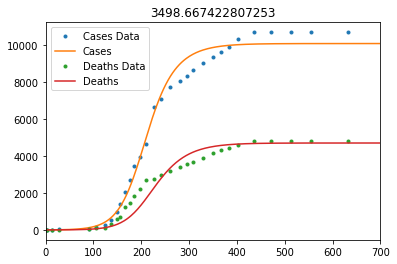

In [33]:
minimizer = lmfit.Minimizer(cost_fun, params,iter_cb = iter_cb)
result = minimizer.minimize(method='nelder')

When the minimizer function runs for a long enough time, the model fits the data fairly well. The part where it fails seems to be in the 200-400 day range where the cases and deaths seem to slow down but are still rising. This linear data indicates that there was likely some sort of intervention taking place in Liberia taking place that educated its citizens to take safety precautions. Whether it be safe burial or media education, it can be seen that cases were still rising but at a slower rate, which was the main goal of this paper. 

# ***References***


**Paper Replicated**

Shen, M., Xiao, Y. & Rong, L. Modeling the effect of comprehensive interventions on Ebola virus transmission. Sci Rep 5, 15818 (2015). https://doi.org/10.1038/srep15818


**Tellurium**

Somogyi, Andy T (2019), "tellurium," https://nanohub.org/resources/tellurium. (DOI: 10.21981/EVG3-D766).

Medley et al. (2018). "Tellurium notebooks—An environment for reproducible dynamical modeling in systems biology." PLoS Computational Biology, 14(6), e1006220.

Choi et al. (2018). "Tellurium: An extensible python-based modeling environment for systems and synthetic biology." Biosystems, 171, 74-79.


